# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here

df.drop(['Id'], axis=1, inplace=True)


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_values.sort_values('percent_missing', inplace=True, ascending=False)
missing_values

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
df.drop(missing_values[missing_values['percent_missing'] > 20]['column_name'], axis=1,inplace=True)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

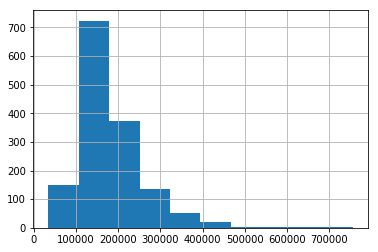

In [6]:

# your code here
df['SalePrice'].hist()

In [7]:
# your comment here
# The distribution of the sale prices is right skewed, with prevailing low-price segment 



## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [8]:
# your code here


## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [9]:
# your 

# First create three newe separate columns with total size, total number of rooms, and year since remodelling
df['size'] = df['GrLivArea'] + df['LotArea'] + df['GarageArea']
df['total_rooms'] = df['BedroomAbvGr'] + df['KitchenAbvGr'] + df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
df['number_year_remodeled'] = 2020 - df['YearRemodAdd']                                                                                                     
                                                                                                                      

Text(0.5, 0.98, 'Sale prices vs GrLivArea')

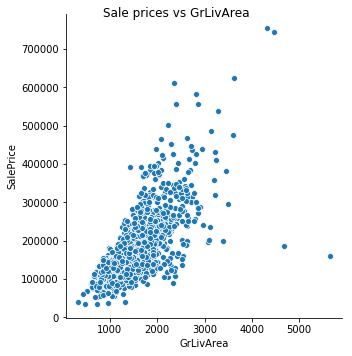

In [10]:
g_GrLivArea = sns.relplot(x="GrLivArea", y="SalePrice", data=df)
g_GrLivArea.fig.suptitle("Sale prices vs GrLivArea")

Text(0.5, 0.98, 'Sale prices vs GarageArea')

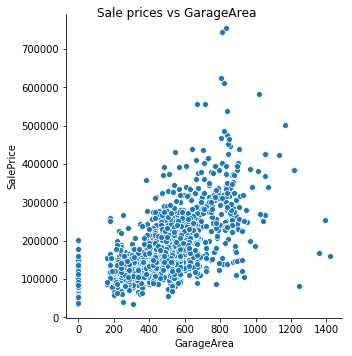

In [11]:
g_garage = sns.relplot(x="GarageArea", y="SalePrice", data=df)
g_garage.fig.suptitle("Sale prices vs GarageArea")

Text(0.5, 0.98, 'Sale prices vs size')

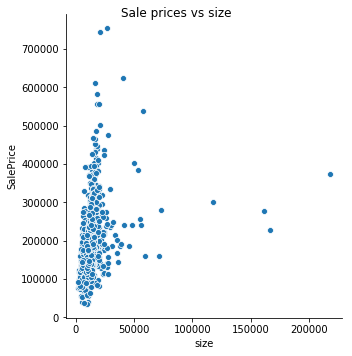

In [12]:
g_size = sns.relplot(x="size", y="SalePrice", data=df)
g_size.fig.suptitle("Sale prices vs size")

Text(0.5, 0.98, 'Sale prices vs LotArea')

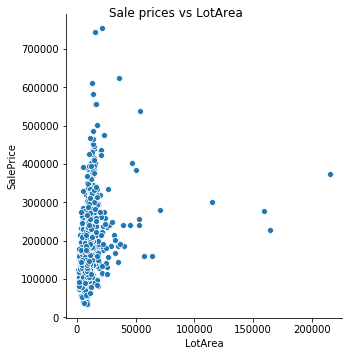

In [13]:
g_LotArea = sns.relplot(x="LotArea", y="SalePrice", data=df)
g_LotArea.fig.suptitle("Sale prices vs LotArea")

Text(0.5, 0.98, 'Sale prices vs number of rooms')

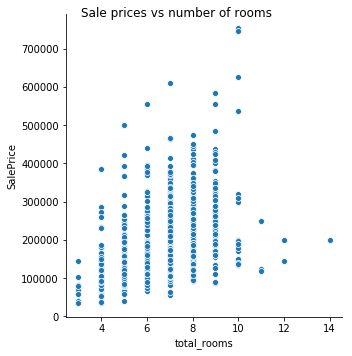

In [14]:
g_rooms = sns.relplot(x="total_rooms", y="SalePrice", data=df)
g_rooms.fig.suptitle("Sale prices vs number of rooms")

Text(0.5, 0.98, 'Sale prices vs year of remodelation')

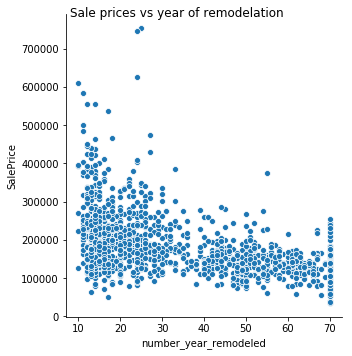

In [15]:
g_remodelation = sns.relplot(x="number_year_remodeled", y="SalePrice", data=df)
g_remodelation.fig.suptitle("Sale prices vs year of remodelation")

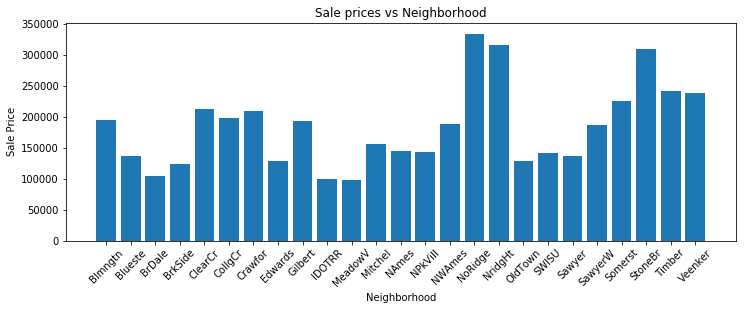

In [16]:
neighborhood = df.groupby('Neighborhood')[['SalePrice']].agg('mean')

data_range = range(len(neighborhood))
plt.figure(figsize=(12, 4))
plt.title("Sale prices vs Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.xticks(data_range, neighborhood.index, rotation=45)
plt.bar(data_range, neighborhood['SalePrice'])
plt.show()

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

In [17]:
# your code here


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [18]:
# your comment here


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [19]:
# Checking the correlation
columns_corr = df[["OverallQual", "SalePrice", "size", "GrLivArea" , "LotArea", "GarageArea", 
                   "total_rooms", "number_year_remodeled", "Neighborhood", "TotalBsmtSF"]]

columns_corr.corr()

,OverallQual,SalePrice,size,GrLivArea,LotArea,GarageArea,total_rooms,number_year_remodeled,TotalBsmtSF
OverallQual,1.000000,0.790982,0.146189,0.593007,0.105806,0.562022,0.371702,-0.550684,0.537808
SalePrice,0.790982,1.000000,0.308438,0.708624,0.263843,0.623431,0.470702,-0.507101,0.613581
size,0.146189,0.308438,1.000000,0.319525,0.998087,0.222146,0.224106,-0.036167,0.289511
GrLivArea,0.593007,0.708624,0.319525,1.000000,0.263116,0.468997,0.711453,-0.287389,0.454868
LotArea,0.105806,0.263843,0.998087,0.263116,1.000000,0.180403,0.184586,-0.013788,0.260833
GarageArea,0.562022,0.623431,0.222146,0.468997,0.180403,1.000000,0.302127,-0.371600,0.486665
total_rooms,0.371702,0.470702,0.224106,0.711453,0.184586,0.302127,1.000000,-0.228790,0.237278
number_year_remodeled,-0.550684,-0.507101,-0.036167,-0.287389,-0.013788,-0.371600,-0.228790,1.000000,-0.291066
TotalBsmtSF,0.537808,0.613581,0.289511,0.454868,0.260833,0.486665,0.237278,-0.291066,1.000000


In [20]:
'''Based on the highest positive correlation observations,  the top 5 factors that affect the sale price are: 

OverallQual - 0.790982
GrLivArea   - 0.708624
GarageCars  - 0.640409
GarageArea  - 0.623431
TotalBsmtSF - 0.613581'''


'Based on the highest correlation observations, the the top 5 factors that affect the sale price are: \n\nOverallQual - 0.790982\nGrLivArea   - 0.708624\nGarageCars  - 0.640409\nGarageArea  - 0.623431\nTotalBsmtSF - 0.613581'

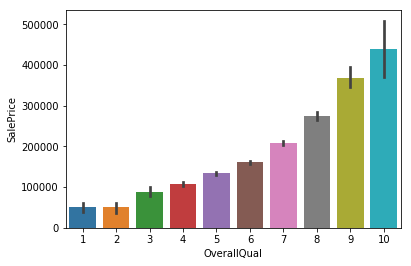

In [21]:
# Factor: Overall Quality

sns.barplot(x='OverallQual', y='SalePrice', data=df)

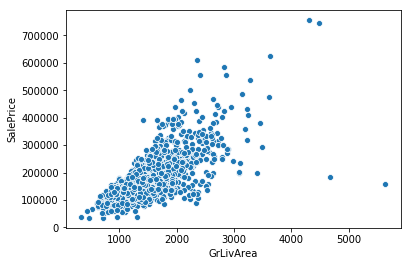

In [22]:
# Factor: Size of the living area

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

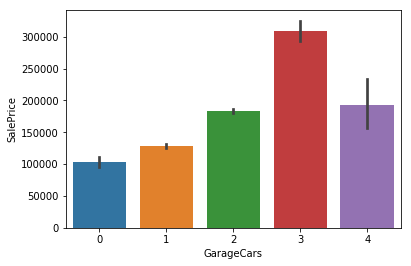

In [23]:
# Factor: Garage capacity

sns.barplot(x='GarageCars', y='SalePrice', data=df)

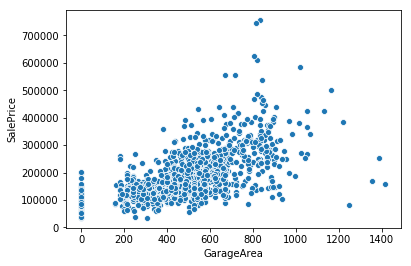

In [24]:
# Factor: Garage area

sns.scatterplot(x='GarageArea', y='SalePrice', data=df)

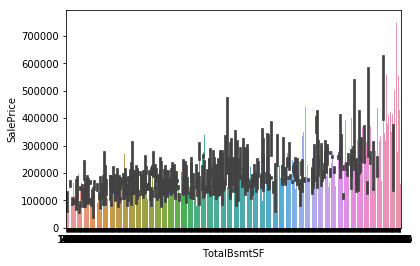

In [25]:
# Factor: Number of bathrooms

sns.barplot(x='TotalBsmtSF', y='SalePrice', data=df)